<a href="https://colab.research.google.com/github/sayarghoshroy/Probabilistic_Graphical_Models_Coursework/blob/master/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Gaussian Mixture Model

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as gaussian

In [0]:
train_size = int(1e4)
test_size = int(3e3)

In [0]:
def make_data(size):
    gaussian_x = np.random.normal(0, 4, size)
    gaussian_y = np.random.normal(-6, 4, size)
    gaussian_z = np.random.normal(6, 4, size)
    dataset = 0.4 * gaussian_x + 0.3 * gaussian_y + 0.3 * gaussian_z
    return dataset

In [0]:
train = make_data(train_size)

In [0]:
# Creating the GMM
model = gaussian(n_components = 3, max_iter = 10000).fit(np.asmatrix(train).T)

In [7]:
print("Model Parameters:")
model.get_params

Model Parameters:


<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>

In [8]:
# creating a dataset for testing
test = make_data(test_size)

# generating plot for the test_set

# sorting testing set in ascending order
test = np.sort(test)

# calculating the most possible origin for each point in test data
probabilities = model.predict_proba(np.asmatrix(test).T)
print("Origin Probabilities:")
print(probabilities)

Origin Probabilities:
[[6.70252926e-08 9.99998923e-01 1.01025272e-06]
 [6.73954032e-08 9.99998914e-01 1.01812273e-06]
 [1.23163634e-07 9.99997521e-01 2.35627152e-06]
 ...
 [9.99997649e-01 9.02323818e-08 2.26053614e-06]
 [9.99999647e-01 2.18868776e-08 3.30945535e-07]
 [9.99999735e-01 1.77732761e-08 2.47484899e-07]]


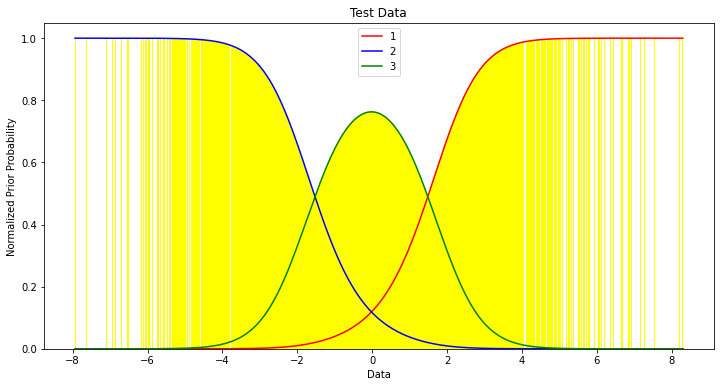

In [9]:
# Finding best Possible Class for Each
best_chance = np.max(probabilities, axis = 1)

chance_x = probabilities[:, 0]
chance_y = probabilities[:, 1]
chance_z = probabilities[:, 2]

# Plotting the Histogram

vis = plt.figure(figsize = (12, 6))
fig = vis.add_subplot('111')
fig.set_title('Test Data')
fig.set_xlabel('Data')
fig.set_ylabel('Normalized Prior Probability')

fig.bar(test, best_chance, width = 0.025, color = 'yellow')
fig.plot(test, chance_x, color = 'red', label = '1')
fig.plot(test, chance_y, color = 'blue', label = '2')
fig.plot(test, chance_z, color = 'green', label = '3')

fig.legend()
vis.show()

In [0]:
# ^_^ Thank You